# Wrangling Lexis Nexis Syria Text Data
## Exploratory Analysis

This file will explore the cleaned text file, run descriptive statistics, and search for most frequently used words. 

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import nltk
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_lexisnexis.csv', low_memory=False)

In [3]:
df.dtypes

publication        object
date               object
title              object
length              int64
publicationtype    object
text               object
year                int64
month               int64
day                 int64
dtype: object

## Most common newspapers

In [4]:
print(df['publication'].value_counts(), "\n\n ", df['publication'].value_counts(normalize=True))

BBC Monitoring Europe - Political Supplied by BBC Worldwide Monitoring                 905
BBC Monitoring Middle East - Political Supplied by BBC Worldwide Monitoring            826
US Official News                                                                       585
The Washington Post                                                                    490
The New York Times                                                                     459
The Guardian                                                                           362
Today's Zaman (Turkey)                                                                 281
Cihan News Agency (CNA)                                                                271
Jerusalem Post                                                                         260
BBC Monitoring Former Soviet Union - Political Supplied by BBC Worldwide Monitoring    245
The Christian Science Monitor                                                          211

## Most common dates for news events

In [5]:
print(df['date'].value_counts(), " \n\n", df['date'].value_counts(normalize=True))

2013-09-05    131
2013-09-04    110
2012-10-23     97
2012-10-24     83
2013-09-03     66
2013-08-31     66
2013-09-06     63
2013-09-09     58
2015-10-21     57
2015-11-20     57
2013-09-02     55
2013-09-10     47
2015-11-17     47
2015-11-18     45
2013-09-08     45
2013-09-07     44
2012-11-08     42
2016-08-16     40
2015-11-13     40
2013-08-30     39
2012-10-22     38
2015-12-03     37
2016-11-09     35
2012-11-07     34
2016-12-31     33
2015-11-28     33
2016-05-11     32
2015-11-14     31
2016-06-03     31
2015-11-15     31
             ... 
2012-05-19      1
2014-02-17      1
2010-07-14      1
2010-06-03      1
2011-04-14      1
2014-04-29      1
2010-09-13      1
2010-06-17      1
2011-11-04      1
2010-12-02      1
2013-02-11      1
2011-04-16      1
2010-10-23      1
2016-02-06      1
2011-09-30      1
2010-05-22      1
2015-02-14      1
2010-04-20      1
2010-12-04      1
2013-04-25      1
2010-03-31      1
2013-01-19      1
2015-05-20      1
2012-02-25      1
2010-07-19

In [6]:
df['year'].describe()

count    14846.000000
mean      2013.818604
std          1.613903
min       2010.000000
25%       2013.000000
50%       2014.000000
75%       2015.000000
max       2017.000000
Name: year, dtype: float64

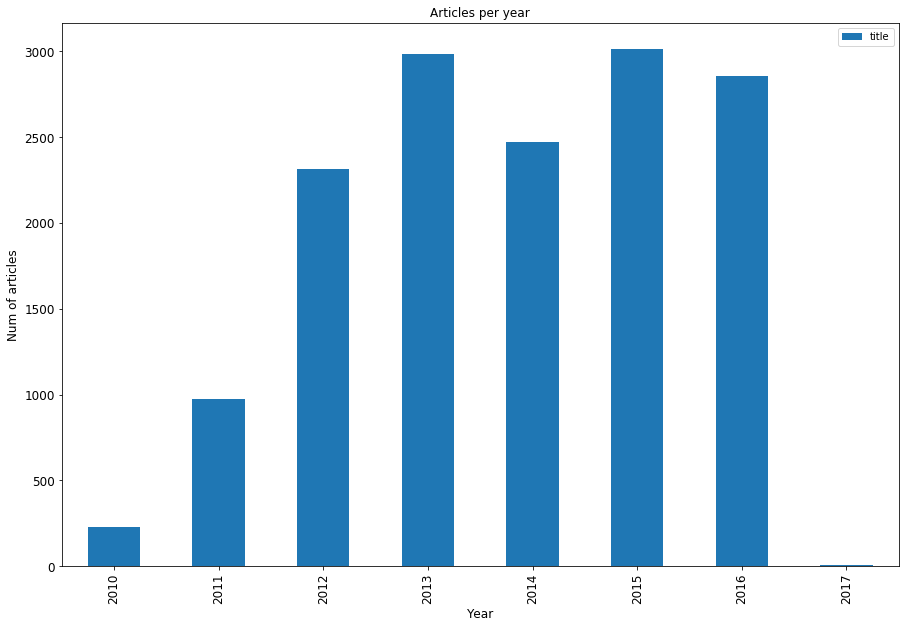

In [24]:
df1 = df.groupby(['year']).count()

ax = df1.title.plot(kind='bar', title ="Articles per year", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Num of articles", fontsize=12)
plt.show()

## Length of newspaper articles

In [25]:
df['length'].describe()

count    14846.000000
mean       858.114037
std        689.237094
min         32.000000
25%        529.000000
50%        737.000000
75%        968.000000
max      14417.000000
Name: length, dtype: float64

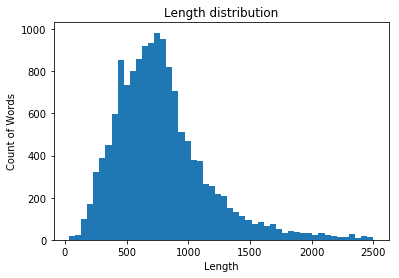

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['length'], bins = 50, range = (df['length'].min(),2500))
plt.title('Length distribution')
plt.xlabel('Length')
plt.ylabel('Count of Words')
plt.show()

## 10 Most Common Words in Title

All frequencies, including STOPWORDS:
  Word  Frequency
0   to       4434
1    ,       4110
2  the       4053
3   's       3399
4   in       3373
5   of       3280
6    :       2886
7    ;       2483
8   on       2478
9  for       2068


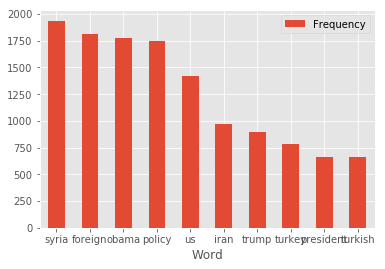

In [27]:
top_N = 10

df2 = pd.read_csv('clean_lexisnexis.csv',
                 usecols=['title'])

txt = df2.title.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
morestopwords = [':', ';', "'s", 'to', 'for', ',', "'", '.', '-', '?', 'says']
for i in morestopwords:
    stopwords.append(i)

words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

## 10 Most Common Words in Text

All frequencies, including STOPWORDS:
   Word  Frequency
0   the     861139
1     ,     646775
2     .     526195
3    to     379245
4    of     375440
5   and     340353
6    in     310343
7     a     266750
8  that     180862
9    is     152314


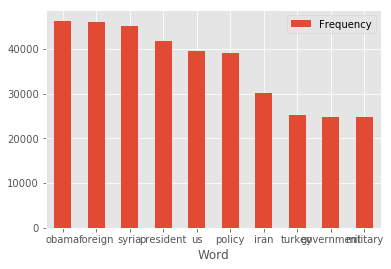

In [28]:
top_N = 10

df3 = pd.read_csv('clean_lexisnexis.csv',
                 usecols=['text'])

txt = df3.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
morestopwords = [':', ';', "'s", 'to', 'for', ',', "'", '.', '-', '?', 'says', '"', "`", "``",
                "''", "(", ")", "said", "would", "also"]
for i in morestopwords:
    stopwords.append(i)

words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)